### Support Vector Classifier Implementation

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 


In [17]:
from sklearn.datasets import make_classification 

X,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0,random_state=11)


In [18]:
df = pd.DataFrame(X)
df.head()

,0,1
0,-2.333828,1.129340
1,-1.352844,0.835194
2,0.438380,0.653286
3,0.655810,0.693583
4,1.700555,1.524446


<Axes: xlabel='0', ylabel='1'>

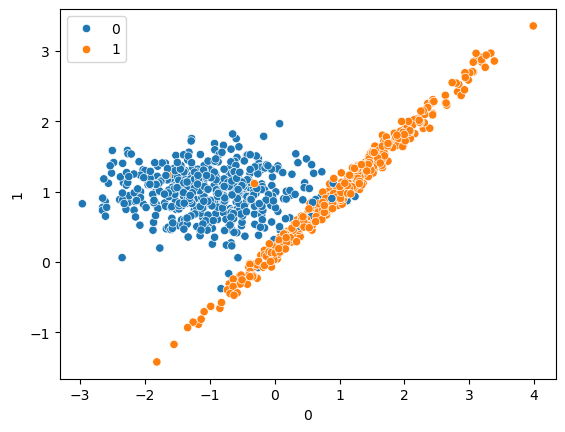

In [19]:
sns.scatterplot(x=df[0],y=df[1],hue=y)

In [20]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=40)

In [21]:
from sklearn.svm import SVC 

svc = SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [22]:
# lets predict 
y_pred_test = svc.predict(X_test)

precision_0 = TN/(TN+FN)

precision_1 = TP/(TP+FP)

recall_0 = TN/(TN+FP)

recall_1 = TP/(TP+FN)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix 

print(classification_report(y_test,y_pred_test))
print(confusion_matrix(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       145
           1       0.95      0.99      0.97       155

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

[[137   8]
 [  2 153]]


### Kernal Mode RBF

In [37]:
Xn,yn = make_classification(n_samples=1000,n_features=2,n_clusters_per_class=2,random_state=4,n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

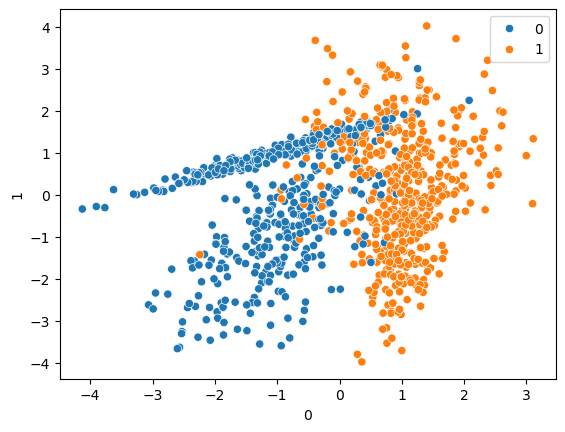

In [39]:
sns.scatterplot(x=pd.DataFrame(Xn)[0],y=pd.DataFrame(Xn)[1],hue=yn)

In [40]:
X_trainn,X_testn,y_trainn,y_testn = train_test_split(Xn,yn,test_size=0.3,random_state=13)

In [41]:
rbf = SVC(kernel='rbf')
rbf.fit(X_trainn,y_trainn)

SVC()

In [42]:
y_pred_rbf_test = rbf.predict(X_testn)

print(classification_report(y_testn,y_pred_rbf_test))
print(confusion_matrix(y_testn,y_pred_rbf_test))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       150
           1       0.92      0.87      0.90       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

[[139  11]
 [ 19 131]]


### Kernel Poly

In [43]:
poly = SVC(kernel='poly')
poly.fit(X_trainn,y_trainn)

SVC(kernel='poly')

In [45]:
y_pred_poly_test = poly.predict(X_testn)

print(classification_report(y_testn,y_pred_poly_test))
print(confusion_matrix(y_testn,y_pred_poly_test))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       150
           1       0.92      0.81      0.86       150

    accuracy                           0.87       300
   macro avg       0.88      0.87      0.87       300
weighted avg       0.88      0.87      0.87       300

[[140  10]
 [ 29 121]]


### Kernel: Sigmoid

In [46]:
sig = SVC(kernel='sigmoid')
sig.fit(X_trainn,y_trainn)

SVC(kernel='sigmoid')

In [47]:
y_pred_sig_test = sig.predict(X_testn)

print(classification_report(y_testn,y_pred_sig_test))
print(confusion_matrix(y_testn,y_pred_sig_test))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       150
           1       0.76      0.80      0.78       150

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300

[[113  37]
 [ 30 120]]


### Hyper Parameter Tuning

In [48]:
from sklearn.model_selection import GridSearchCV 

param_grid = {
    'C': [0.1,1,10,100,1000],
    'gamma': [1,0.1,0.01,0.001,0.0001],
    'kernel': ['rbf','poly','sigmoid']
}

### About verbose parameter:

"verbose" levels:

0 (default): No output is printed. The process runs silently.

1: A minimal amount of information is printed, such as the number of parameter combinations being evaluated.

2: Detailed output is printed for each model's fitting process, including the completion of each combination.

3 or higher: Even more detailed information is displayed, showing the progress of every individual split (fold) during cross-validation.

Used for debugging the hyper-paramter tuning

Fitting 5 folds for each of 10 candidates, totaling 50 fits   
[CV 1/5] END C=1, kernel=linear; accuracy: 0.92  
[CV 2/5] END C=1, kernel=linear; accuracy: 0.93  
[CV 3/5] END C=1, kernel=linear; accuracy: 0.91  
...


### About refit=True

Optimized Model:  

After the search identifies the best parameters based on a scoring metric (e.g., accuracy, F1 score), the model is retrained to ensure it is fully optimized for those parameters.  

Convenience:

The refit step provides you with a final, ready-to-use model (best_estimator_) that has been trained on the entire dataset with the best parameters.  

Performance:  

The final model can be used directly for predictions or evaluations on unseen test data without needing to manually retrain it.

In [50]:
model = SVC()
grid = GridSearchCV(estimator=model,param_grid=param_grid,refit=True,cv=5,verbose=3)

In [51]:
grid.fit(X_trainn,y_trainn)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.843 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.914 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.914 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.921 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.936 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.850 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.893 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.886 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.886 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.907 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.714 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

In [52]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [53]:
### Prediction on our tuned model
y_pred_tuned_test = grid.predict(X_testn)

print(classification_report(y_testn,y_pred_tuned_test))
print(confusion_matrix(y_testn,y_pred_tuned_test))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       150
           1       0.94      0.89      0.91       150

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

[[142   8]
 [ 17 133]]
